In [2]:
import cobra
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
model=cobra.io.load_matlab_model('HumanGEMNHBESARS_cons.mat')
model.objective='Cov2VBOF'

In [5]:
bio=model.reactions.get_by_id('Cov2VBOF')
met_pc=bio.metabolites
met_names=[]
met_coeff=[]
met_formula=[]
met_chemnames=[]
for met in met_pc:
    met_names.append(met.id)
    met_coeff.append(met_pc[met])


In [6]:
def gr(p,metc,metn):
        
        #Increase
        modelf=model.copy()
        biof=modelf.reactions.get_by_id('Cov2VBOF')
        biof.add_metabolites({modelf.metabolites.get_by_id(metn):p*(-metc)})
        gr_plus10=modelf.slim_optimize()
#         print(gr_plus10)
#         optgr_p10=cnratio(modelf)
        
        #Decrease
        modelf=model.copy()
        biof=modelf.reactions.get_by_id('Cov2VBOF')
        biof.add_metabolites({modelf.metabolites.get_by_id(metn):p*(metc)})
        gr_minus10=modelf.slim_optimize()
#         print(gr_minus10)
        
        return [gr_plus10,gr_minus10,metn]

In [7]:
def sensitivity(p):
    p10=[]
    m10=[]
    mname=[]
    for metn,metc in zip(met_names,met_coeff):
        print('Current Biomass Precursor: ',metn)
        
        if(metc<0):
            gr_out=gr(p,metc,metn)
            if(gr_out!=None):
                p10.append(gr_out[0])
                m10.append(gr_out[1])
                mname.append(gr_out[2])
    return [p10,m10,mname]
    #     print('Increase-Growth Rate: ',grp10)
    #     print('Decrease-Growth Rate: ',grm10)

In [8]:
def impact(p10,m10):
    imp=[]
    for pgr,ngr in zip(p10,m10):
        val=(pgr-ngr)/(2*p*(model.slim_optimize()))
        imp.append(val)
    return imp

In [9]:
pgr=[]
ngr=[]

get_list=sensitivity(0.1)
#     impact_vals=impact(get_list[0],get_list[1])
data=pd.DataFrame(index=get_list[2])

pgr.append(get_list[0])
ngr.append(get_list[1])

Current Biomass Precursor:  m01285c
Current Biomass Precursor:  m01307c
Current Biomass Precursor:  m01365c
Current Biomass Precursor:  m01369c
Current Biomass Precursor:  m01370c
Current Biomass Precursor:  m01371c
Current Biomass Precursor:  m01450c
Current Biomass Precursor:  m01623c
Current Biomass Precursor:  m01628c
Current Biomass Precursor:  m01974c
Current Biomass Precursor:  m01975c
Current Biomass Precursor:  m01986c
Current Biomass Precursor:  m02034c
Current Biomass Precursor:  m02039c
Current Biomass Precursor:  m02040c
Current Biomass Precursor:  m02125c
Current Biomass Precursor:  m02184c
Current Biomass Precursor:  m02360c
Current Biomass Precursor:  m02426c
Current Biomass Precursor:  m02471c
Current Biomass Precursor:  m02527c
Current Biomass Precursor:  m02684c
Current Biomass Precursor:  m02685c
Current Biomass Precursor:  m02724c
Current Biomass Precursor:  m02750c
Current Biomass Precursor:  m02751c
Current Biomass Precursor:  m02759c
Current Biomass Precursor:  

In [10]:
data['Increase']=pgr[0]
data['Decrease']=ngr[0]
data['Diff']=data['Increase']-data['Decrease']

In [16]:
data=data.sort_values(by='Diff',ascending=False)

In [44]:
met_names=[]
for ix in data.index:
    met_names.append(model.metabolites.get_by_id(ix).name.capitalize())

In [66]:
df_sorted=data.iloc[0:10,:]

In [77]:
met_names[9]='NAG'

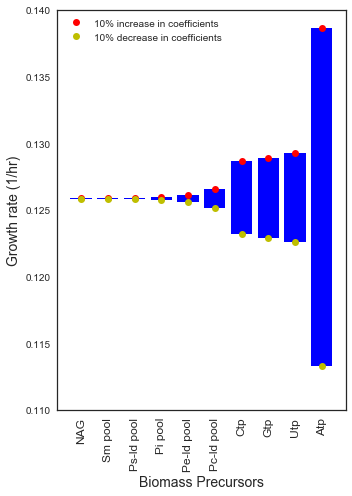

In [89]:
import matplotlib.ticker as ticker

plt.style.use('seaborn-white')

fig,ax=plt.subplots(nrows=1,ncols=1,figsize=(5,7))
ax.bar(df_sorted.index,df_sorted['Diff'],bottom=df_sorted['Decrease'],color='b')
ax.set_xlabel('Biomass Precursors',fontsize=14)
ax.set_ylabel('Growth rate (1/hr)',fontsize=14)
# ax.set_xlim([0.205,0.24])
# plt.yticks(np.arange(0,len(df_sorted)),rotation=90)
ax.set_xticklabels(met_names[0:10],fontsize=12,rotation=90)
ax.plot(df_sorted['Increase'],'ro')
ax.plot(df_sorted['Decrease'],'yo')
ax.legend(['10% increase in coefficients','10% decrease in coefficients'],fontsize=10)
ax.set_ylim(0.11,0.14)
# ax.plot([9.5,9.5],[0.11,0.14])
plt.gca().invert_xaxis()
# plt.text(27,0.111,'No effect on growth rate',fontsize=12)
# plt.text(8.5,0.111,'Effect on growth rate',fontsize=12)
fig.tight_layout()

fig.savefig('D:/COVID19/Manuscript/Figure1E.png',dpi=600)